# Wine Quality Regression and Classification Model

## Data Exploration and Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [2]:
red = pd.read_csv('winequality-red.csv', sep = ';')
white = pd.read_csv('winequality-white.csv', sep = ';')

In [3]:
red.head()

In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
red.drop_duplicates(keep='first', inplace = True)
white.drop_duplicates(keep = 'first', inplace = True)

In [8]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Outliers seem to be present in features: free sulfur dioxide and total sulfur dioxide

In [9]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### Outliers seem to be present in features: free sulfur dioxide and total sulfur dioxide

In [10]:
red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Addressing Outliers with Winsorizing approach

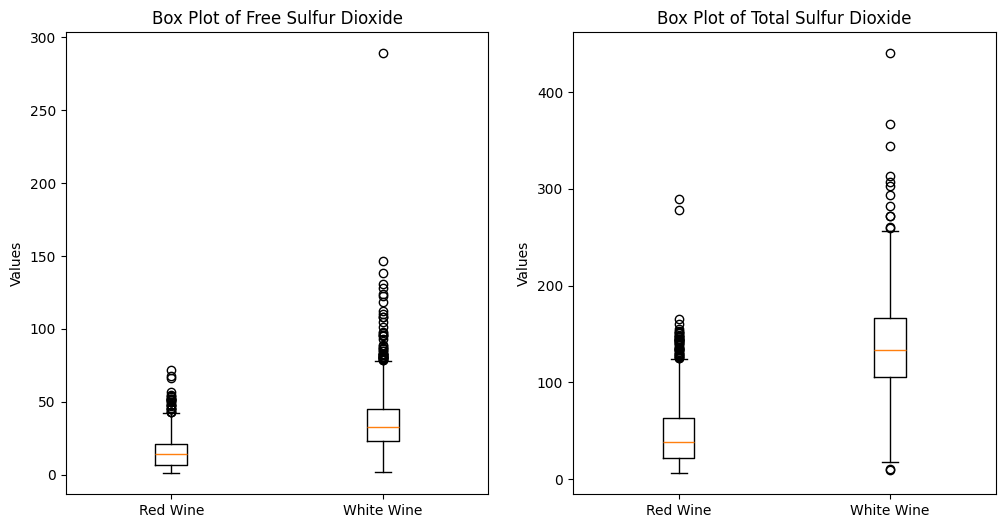

In [12]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([red['free sulfur dioxide'], white['free sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Free Sulfur Dioxide')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
plt.boxplot([red['total sulfur dioxide'], white['total sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Total Sulfur Dioxide')
plt.ylabel('Values')
plt.show()

In [13]:
# Function for capping outliers which is not in the range of 1st to 99th percentile
def cap_outliers_iqr(df, column):
    lower_cap = df[column].quantile(0.01)
    upper_cap = df[column].quantile(0.99)
    
    # Cap the outliers
    df[column] = np.where(df[column] < lower_cap, lower_cap,
                          np.where(df[column] > upper_cap, upper_cap, df[column]))
    
    return df

column_outlier = ['free sulfur dioxide', 'total sulfur dioxide']

X_red_capped = red.copy().drop(columns = 'quality')
X_white_capped = white.copy().drop(columns = 'quality')

for column in column_outlier:
    X_red_capped = cap_outliers_iqr(X_red_capped, column)
    X_white_capped = cap_outliers_iqr(X_white_capped, column)

In [14]:
X_red_capped.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.835173,46.573407,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.195767,32.184686,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,3.000000,8.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,50.000000,145.840000,1.003690,4.010000,2.000000,14.900000


### Results after removing outliers

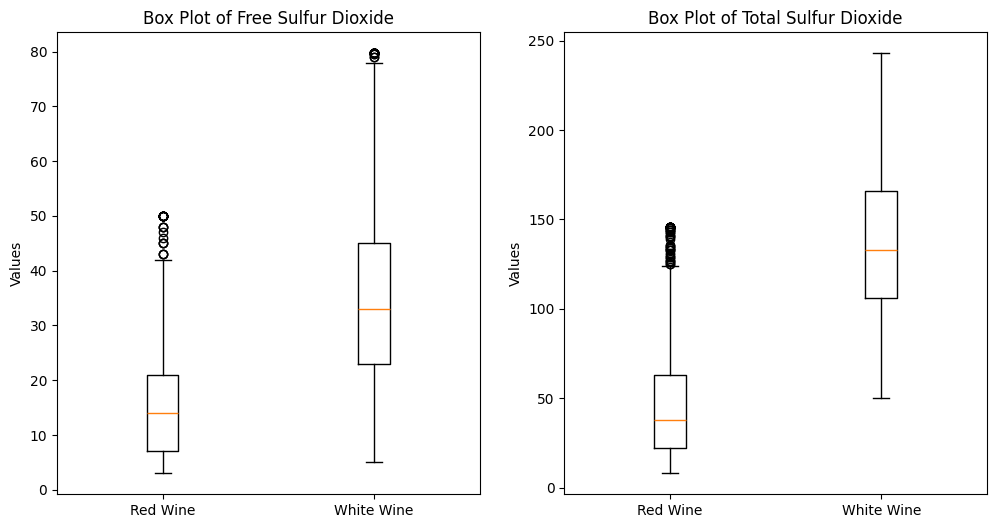

In [15]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([X_red_capped['free sulfur dioxide'], X_white_capped['free sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Free Sulfur Dioxide')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
plt.boxplot([X_red_capped['total sulfur dioxide'], X_white_capped['total sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Total Sulfur Dioxide')
plt.ylabel('Values')
plt.show()

## Data Visualization

Text(0.5, 0, 'White Wine Quality')

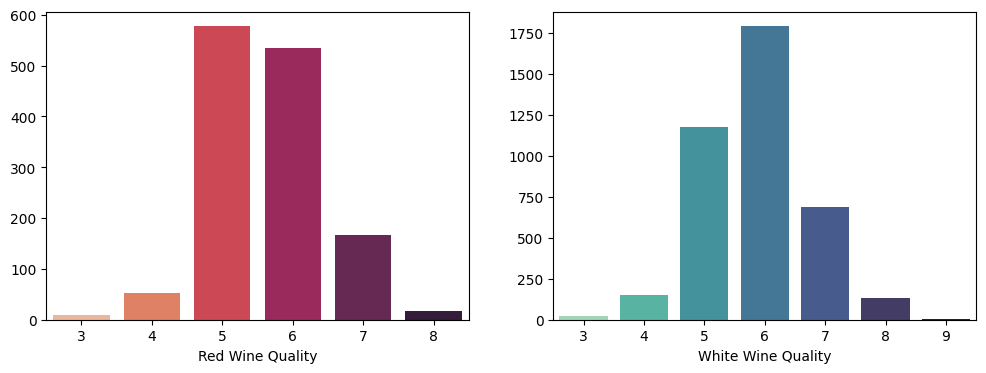

In [16]:
plt.figure(figsize = (12, 4))

xy_red = red['quality'].value_counts().sort_index() # this is used for x and y in sns.barplot
xy_white = white['quality'].value_counts().sort_index()
palette_red = sns.color_palette("rocket", len(xy_red))[::-1] # reverse the color palette so that higher quality is associated with darker color
palette_white = sns.color_palette("mako", len(xy_white))[::-1]

plt.subplot(1, 2, 1)
sns.barplot(x = xy_red.index, y = xy_red.values, hue = xy_red.index, palette=palette_red, legend=False)
plt.xlabel('Red Wine Quality')

plt.subplot(1, 2, 2)
sns.barplot(x = xy_white.index, y = xy_white.values, hue = xy_white.index, palette=palette_white, legend=False)
plt.xlabel('White Wine Quality')

#### Hence, this is an imbalanced dataset

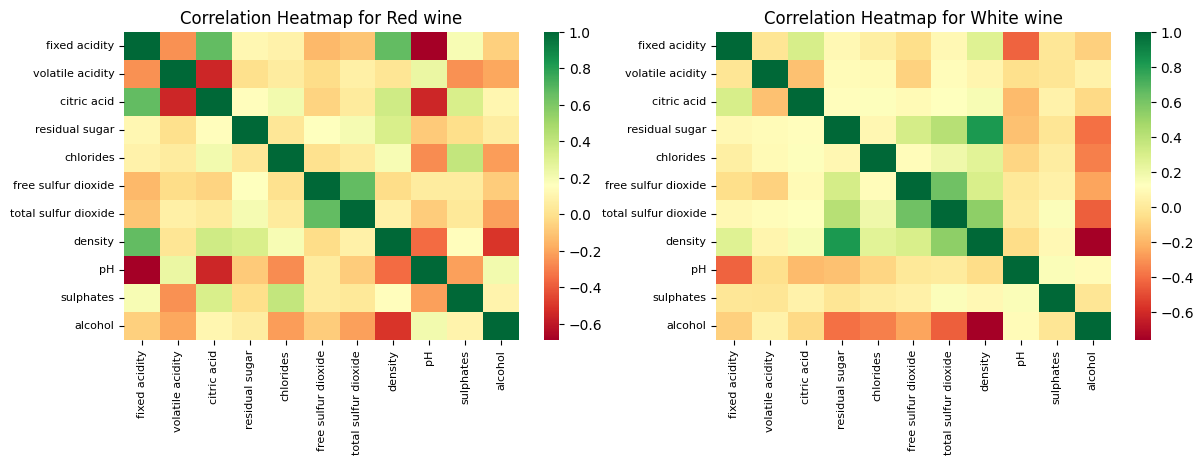

In [17]:
plt.figure(figsize = (14, 4))

plt.subplot(1, 2, 1)
sns.heatmap(red.drop(columns = 'quality').corr(), cmap = 'RdYlGn')
plt.title('Correlation Heatmap for Red wine')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.subplot(1, 2, 2)
sns.heatmap(white.drop(columns = 'quality').corr(), cmap = 'RdYlGn')
plt.title('Correlation Heatmap for White wine')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

## Feature Regression

### Lasso Regression for Red wine

In [18]:
y_red = red[['quality']]

X_feature_red = X_red_capped.values
y_feature_red = y_red.values
names = red.drop(columns = 'quality').columns # similar to white wine dataframe

# parameters to be tested on GridSearchCV
params = {"alpha": np.linspace(0.00001, 10, 500)}

# setting KFold for Cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Instantiate a lasso regression model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv = GridSearchCV(lasso, param_grid = params, cv = kf)
lasso_cv.fit(X_red_capped, y_red)
print(f'Best Lasso Alpha for Red wine: {lasso_cv.best_params_}')

Best Lasso Alpha for Red wine: {'alpha': np.float64(1e-05)}


### Lasso Regression for White wine

In [19]:
y_white = white[['quality']]

X_feature_white = X_white_capped.values
y_feature_white = y_white.values

# parameters to be tested on GridSearchCV
params = {"alpha": np.arange(0.00001, 10, 500)}

# GridSearchCV with model, params and folds.
lasso_cv = GridSearchCV(lasso, param_grid = params, cv = kf)
lasso_cv.fit(X_white_capped, y_white)
print("Best Lasso Alpha for White wine {}".format(lasso_cv.best_params_))

Best Lasso Alpha for White wine {'alpha': np.float64(1e-05)}


## Plot Feature Selection

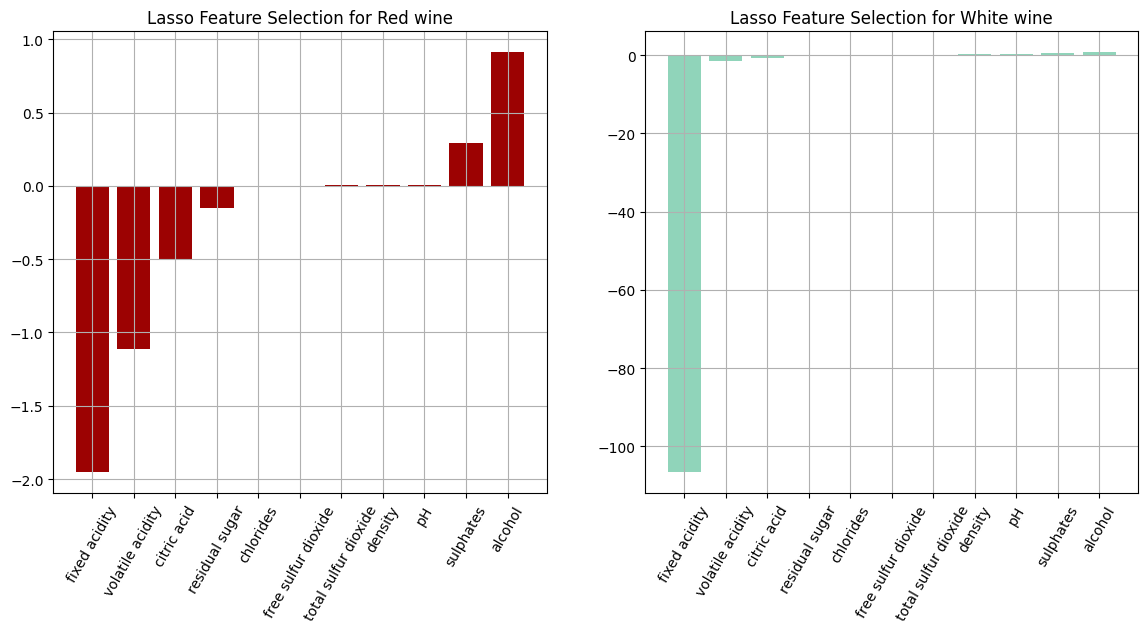

In [20]:
# Red wine
lasso = Lasso(alpha = 0.00001)
lasso.fit(X_feature_red, y_feature_red) 
lasso_coef_red = np.sort(lasso.coef_)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(names, lasso_coef_red, color = '#9c0202')
plt.grid()
plt.title('Lasso Feature Selection for Red wine')
plt.xticks(rotation=60)

# White wine
lasso.fit(X_feature_white, y_feature_white) 
lasso_coef_white = np.sort(lasso.coef_)

plt.subplot(1, 2, 2)
plt.bar(names, lasso_coef_white, color = '#90d4ba')
plt.grid()
plt.title('Lasso Feature Selection for White wine')
plt.xticks(rotation=60)
plt.show()

#### Therefore, I will be using these features
1. Red wine: fixed acidity, volatile acidity, citric acid, alcohol, sulphates, residual sugar, chlorides
2. White wine: fixed acidity, volatile acidity

## Data Prediction
### Linear Regression Model
We will be using Negative Mean Absolute Error as a scoring metric because it is appropriate for imbalanced data
- For Negative Mean Absolute Error (which ranges from negative infinity to 0), a score of 0 indicates perfect predictions, while negative scores indicate the extent of error in the predictions, with larger absolute values indicating worse performance.

In [21]:
X_red_capped_for_train = X_red_capped[['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'sulphates', 'residual sugar', 'chlorides']]
y_red = red[['quality']]

X_white_capped_for_train = X_white_capped[['fixed acidity', 'volatile acidity']]
y_white = white[['quality']]

In [22]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red_capped_for_train, y_red, test_size = 0.30, random_state = 42, stratify = y_red)

In [23]:
lin_reg = LinearRegression()
lin_reg_cv_scores = cross_val_score(lin_reg, X_train_red, y_train_red, cv = kf, scoring = 'neg_mean_absolute_error')

print(f'Accuracy of Linear Regression Model for Red Wine train dataset: {-lin_reg_cv_scores}')
print(f'Mean Accuracy for Red Wine train dataset: {-lin_reg_cv_scores.mean()}') # negate to positive MAE

Accuracy of Linear Regression Model for Red Wine train dataset: [0.5243302  0.52601522 0.5156273  0.54535747 0.46095698]
Mean Accuracy for Red Wine train dataset: 0.5144574330740775


In [24]:
lin_reg.fit(X_train_red, y_train_red)
print(f'MAE of Linear Regression Model for Red Wine test dataset: {lin_reg.score(X_test_red, y_test_red)}')

MAE of Linear Regression Model for Red Wine test dataset: 0.33629003975843974


In [25]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white_capped_for_train, y_white, test_size = 0.30, random_state = 42, stratify = y_white)

In [26]:
lin_reg_cv_scores_white = cross_val_score(lin_reg, X_train_white[['fixed acidity']], y_train_white, cv = kf, scoring = 'neg_mean_absolute_error')

print(f'Accuracy of Linear Regression Model for White Wine train dataset: {-lin_reg_cv_scores_white}')
print(f'Mean Accuracy for White Wine train dataset: {-lin_reg_cv_scores_white.mean()}') # negate to positive MAE

Accuracy of Linear Regression Model for White Wine train dataset: [0.66231868 0.65220883 0.67655388 0.68812559 0.68793482]
Mean Accuracy for White Wine train dataset: 0.6734283594015363


In [27]:
lin_reg.fit(X_train_white, y_train_white)
print(f'MAE of Linear Regression Model for White Wine test dataset: {lin_reg.score(X_test_white, y_test_white)}')

MAE of Linear Regression Model for White Wine test dataset: 0.0527586199809037


### Rule Engine Node to Create a Binary Target Variable

In [28]:
y_red.loc[:, 'quality'] = np.where(y_red['quality'] > 6.5, 1, 0)  # 1 = good, 0 = bad
y_white.loc[:, 'quality'] = np.where(y_white['quality'] > 6.5, 1, 0)  # 1 = good, 0 = bad

([<matplotlib.axis.XTick at 0x21a5cf12810>,
 [Text(0, 0, 'Bad'), Text(1, 0, 'Good')])

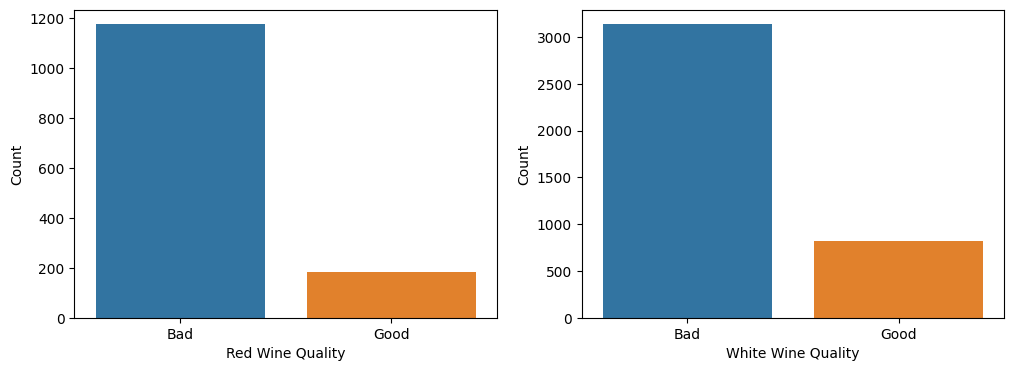

In [29]:
plt.figure(figsize = (12, 4))

xy_red = y_red['quality'].value_counts().sort_index() # this is used for x and y in sns.barplot
xy_white = y_white['quality'].value_counts().sort_index()

plt.subplot(1, 2, 1)
sns.barplot(x = xy_red.index, y = xy_red.values, hue = xy_red.index, legend=False)
plt.xlabel('Red Wine Quality')
plt.ylabel('Count')
plt.xticks([0, 1], ['Bad', 'Good'])

plt.subplot(1, 2, 2)
sns.barplot(x = xy_white.index, y = xy_white.values, hue = xy_white.index, legend=False)
plt.xlabel('White Wine Quality')
plt.ylabel('Count')
plt.xticks([0, 1], ['Bad', 'Good'])

#### Hence, this is the imbalanced dataset

### Decision Tree
I will use ROC curve and the AUC value and scoring metric because they suits imbalanced dataset

In [30]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red_capped_for_train, y_red, test_size = 0.30, random_state = 42, stratify = y_red)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white_capped_for_train, y_white, test_size = 0.30, random_state = 42, stratify = y_white)

In [31]:
# adjust for imbalanced data, giving more weight to minority class than before adjusting
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced') # balanced class weight help adjust weight for imbalanced dataset

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}

red_search = GridSearchCV(estimator=tree,
                             param_grid=param_grid, 
                             scoring='roc_auc', # suits when class imbalance is present.
                             cv=kf,           
                             verbose=2,
                             n_jobs=-1)

red_search.fit(X_train_red, y_train_red)

print(f'Best Parameters: {red_search.best_params_}')
print(f'Best Cross-Validation Score: {red_search.best_score_}')

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best Cross-Validation Score: 0.8180501819168484


C:\Users\Terra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [32]:
best_red = red_search.best_estimator_
y_prob_red = best_red.predict_proba(X_test_red)[:, 1] # probabilities for 'good' class

# calculate ROC Curve and AUC
fpr_red, tpr_red, thresholds_red = roc_curve(y_test_red, y_prob_red)
roc_auc_red = auc(fpr_red, tpr_red)

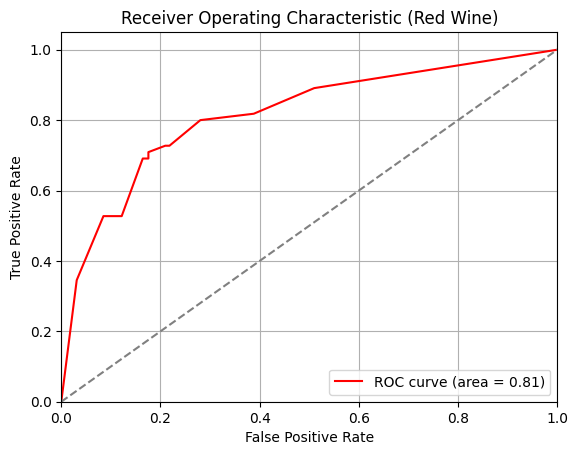

In [33]:
plt.figure()
plt.plot(fpr_red, tpr_red, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc_red))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Red Wine)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [34]:
# adjust for imbalanced data, giving more weight to minority class than before adjusting
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced') # balanced class weight help adjust weight for imbalanced dataset

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}

white_search = GridSearchCV(estimator=tree,
                             param_grid=param_grid, 
                             scoring='roc_auc', # suits when class imbalance is present.
                             cv=kf,           
                             verbose=2,
                             n_jobs=-1)

white_search.fit(X_train_white, y_train_white)

print(f'Best Parameters: {white_search.best_params_}')
print(f'Best Cross-Validation Score: {white_search.best_score_}')

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20}
Best Cross-Validation Score: 0.583365588750619


In [35]:
best_white = white_search.best_estimator_
y_prob_white = best_white.predict_proba(X_test_white)[:, 1] # probabilities for 'good' class

# calculate ROC Curve and AUC
fpr_white, tpr_white, thresholds_white = roc_curve(y_test_white, y_prob_white)
roc_auc_white = auc(fpr_white, tpr_white)

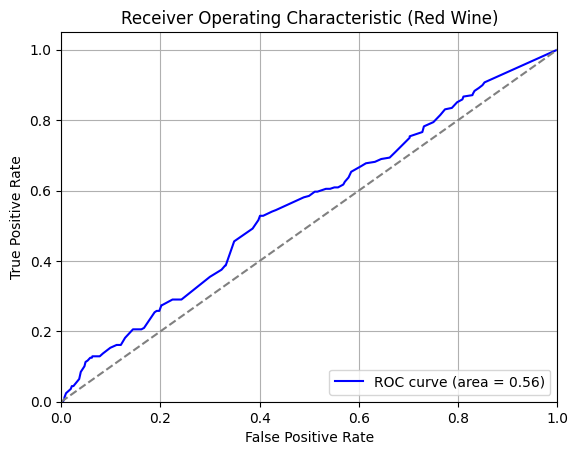

In [36]:
plt.figure()
plt.plot(fpr_white, tpr_white, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_white))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Red Wine)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### Two Decision Tree models that I have created work differently. Model for red wine can predict and differentiate between good and bad wine better than model for white wine.